<a href="https://colab.research.google.com/github/musah29/Teleco_Customer_Churn_Analysis/blob/main/LP3_TELCO_CHURN_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GROUP BEIJING**

**TELCOM CUSTOMER CHURN ANALYSIS**

In the highly competitive telecommunications industry, retaining customers is crucial for the success of any company. Customer churn, or the loss of customers to competitors or other reasons, can have a significant impact on a telecom company's revenue and profitability. Therefore, predicting and reducing customer churn is a top priority for many telecom companies. In this project, we aim to perform a churn analysis using four machine learning models to predict which customers are most likely to churn. By analyzing customer behavior, usage patterns, and other relevant factors, we can identify the key factors driving churn and develop targeted strategies to retain customers. The goal of this project is to provide valuable insights for telecom companies to reduce churn and improve customer retention rates.

**QUESTIONS**

**HYPOTHESIS**

Customers who have been with the company for a longer period are less likely to churn" can be stated as follows:

**Null hypothesis:** There is no significant correlation between customer tenure and churn rates.

**Alternative hypothesis:** There is a significant negative correlation between customer tenure and churn rates, indicating that as customer tenure increases, churn rates decrease.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORTATIONS

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
customer_list=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CHURN ANALYSIS/Telco-Customer-Churn.csv')

In [4]:
customer_list.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
customer_list.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
customer_list.size

147903

In [8]:
#CONVERT churn,gender,phoneservice,paperlessbilling to numerical data types for visualisation

customer_list['Churn']=customer_list['Churn'].apply(lambda x:1 if x=='Yes' else 0)
customer_list['gender']=customer_list['gender'].apply(lambda x:1 if x=='Male' else 0)
customer_list['PhoneService']=customer_list['PhoneService'].apply(lambda x:1 if x=='Yes' else 0)
customer_list['PaperlessBilling']=customer_list['PaperlessBilling'].apply(lambda x:1 if x=='Yes' else 0)

#EXPLORATORY DATA ANALYSIS

---



VISUALIZING THE DATAFRAME

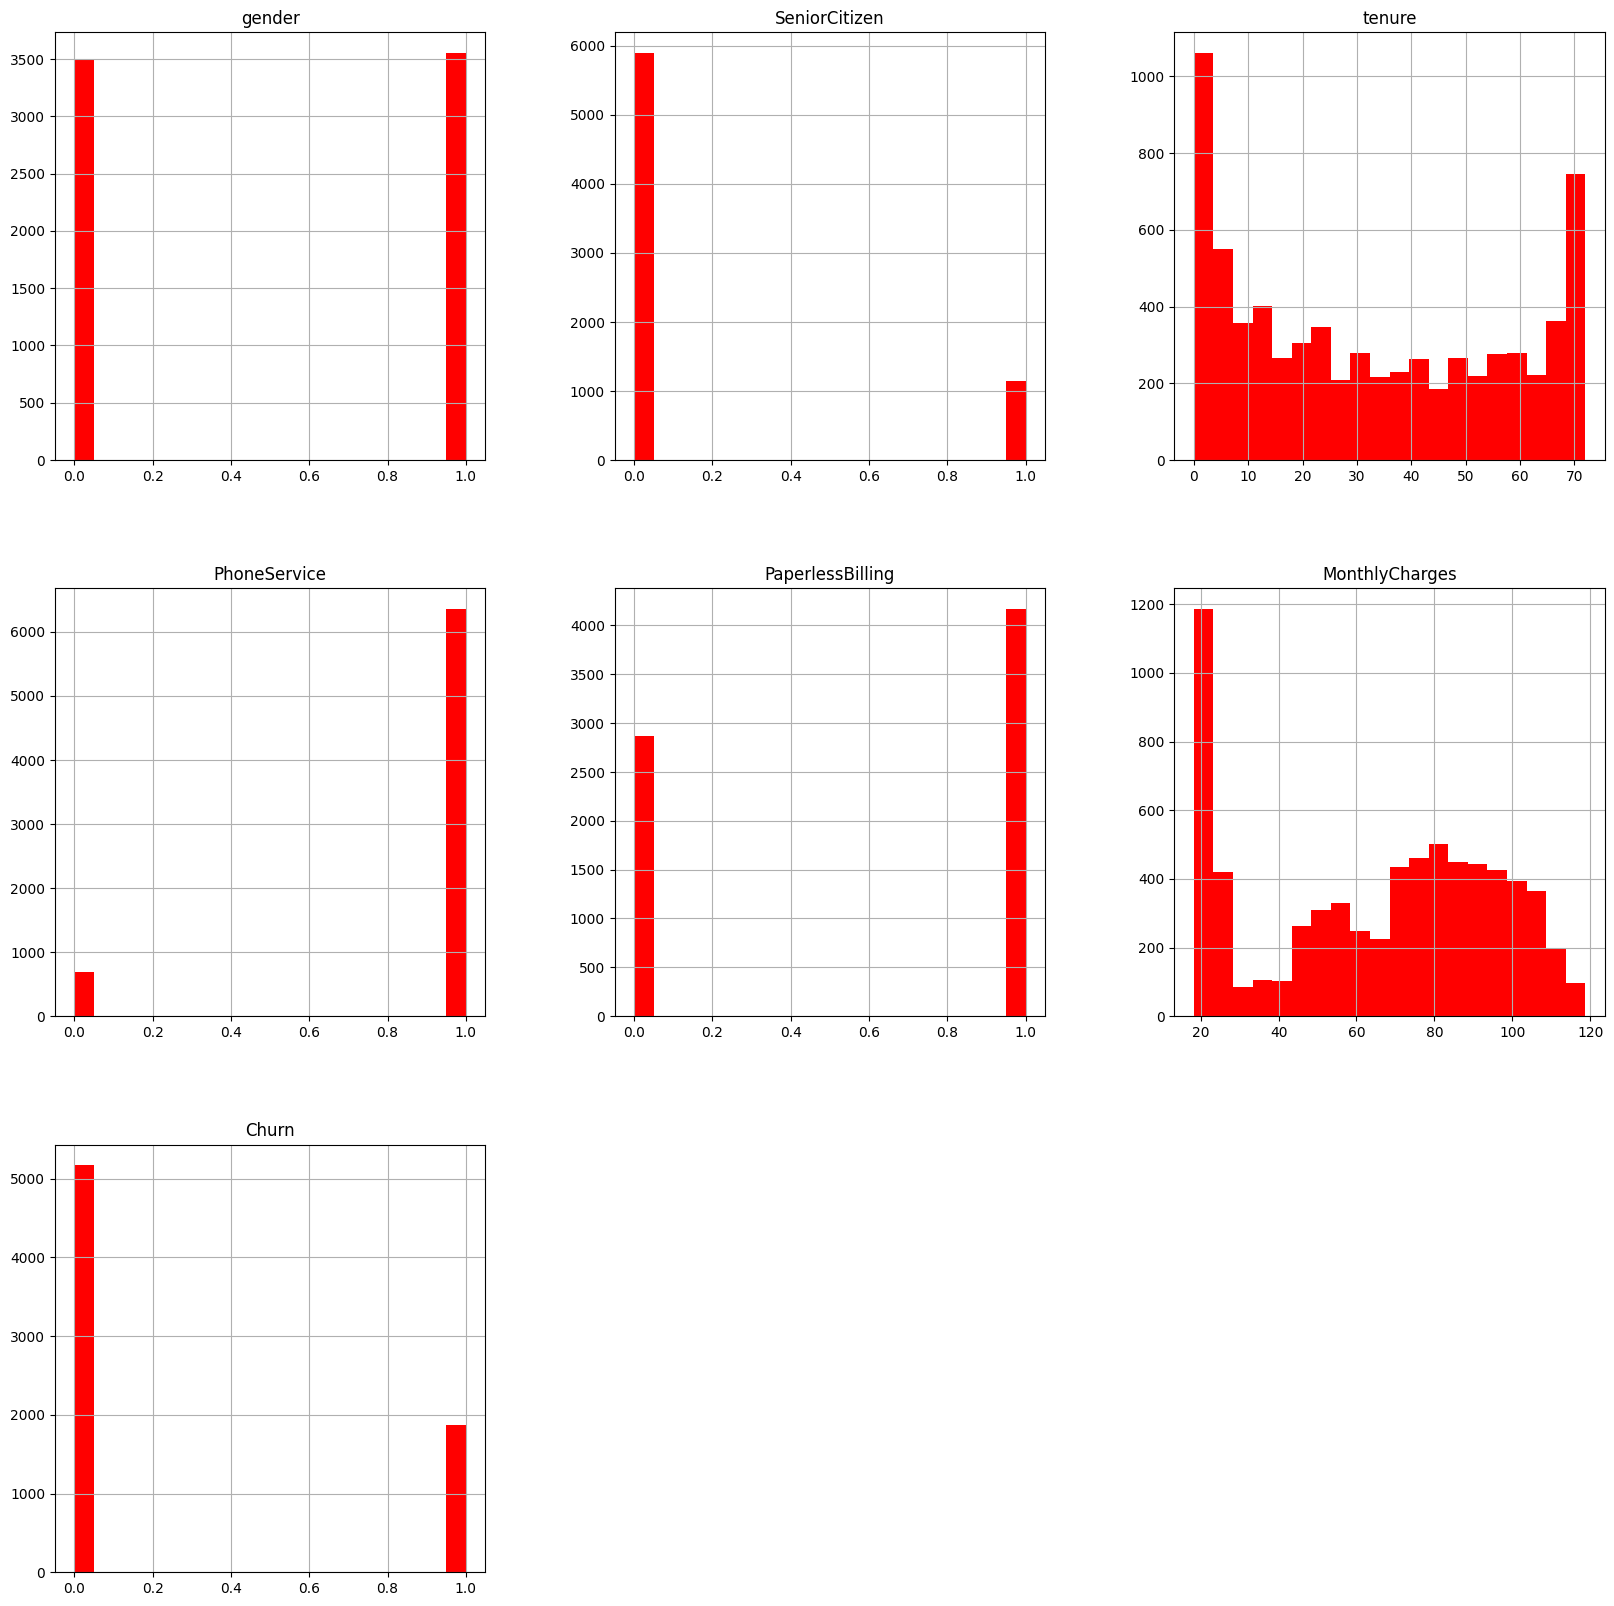

In [46]:
customer_list.hist(bins=20, figsize=(20,20), color='r');
#employees.hist(bins=30, figsize=(20,20), color='r');

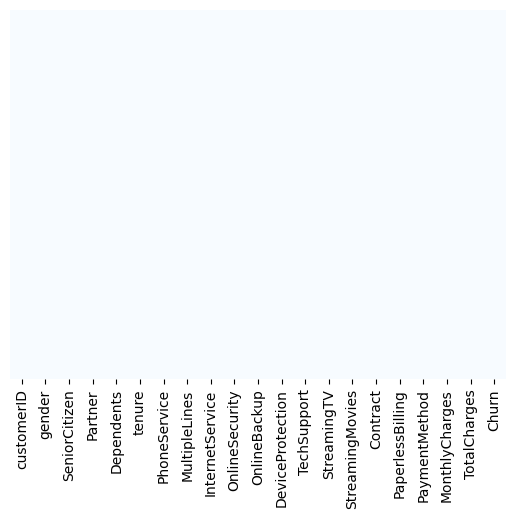

In [10]:
#Check for missing data

sns.heatmap(customer_list.isnull(),yticklabels=False,cbar=False,cmap='Blues');

***THERE ARE NO MISSING VALUES IN THE ENTIRE DATASET***

In [11]:
#Drop the customer ID column as it has not influence on whether customer will churn or not

customer_list.drop(['customerID'], axis=1, inplace=True)

In [12]:
# Let's see how many customers left the company! 
churned_=customer_list[customer_list['Churn']==1]
stay_=customer_list[customer_list['Churn']==0]

In [13]:
# Count the number of customers who stayed and left
# It seems that we are dealing with an imbalanced dataset 
print('Total= ', len(customer_list))
print('Number of customers who left= ', len(churned_))
print('% of customers who left= ', 1*len(churned_)/len(customer_list)*100, '%')

Total=  7043
Number of customers who left=  1869
% of customers who left=  26.536987079369588 %


In [14]:
print('Total= ', len(customer_list))
print('Number of customers who stayed= ', len(stay_))
print('% of customers who stayed= ', 1*len(stay_)/len(customer_list)*100, '%')

Total=  7043
Number of customers who stayed=  5174
% of customers who stayed=  73.4630129206304 %


<ipython-input-20-5aa67c993021>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=customer_list.corr()


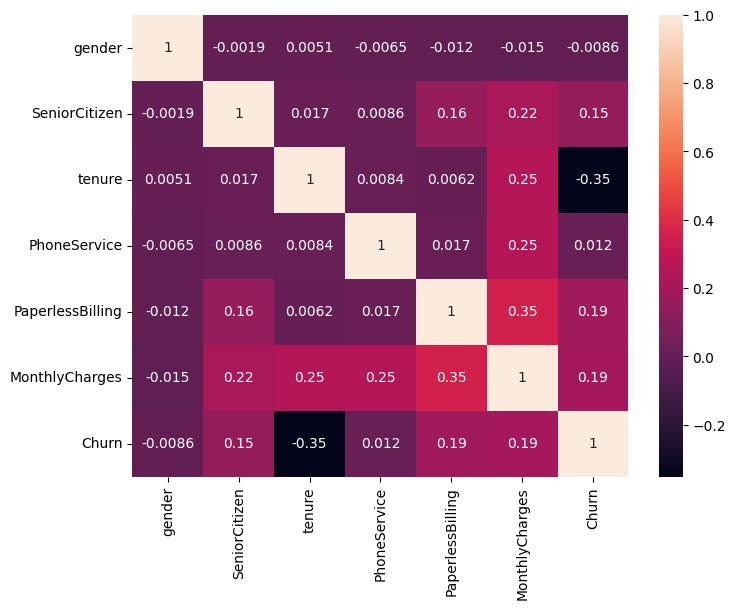

In [20]:
correlations=customer_list.corr()
f,ax=plt.subplots(figsize=(8,6))
sns.heatmap(correlations,annot=True);

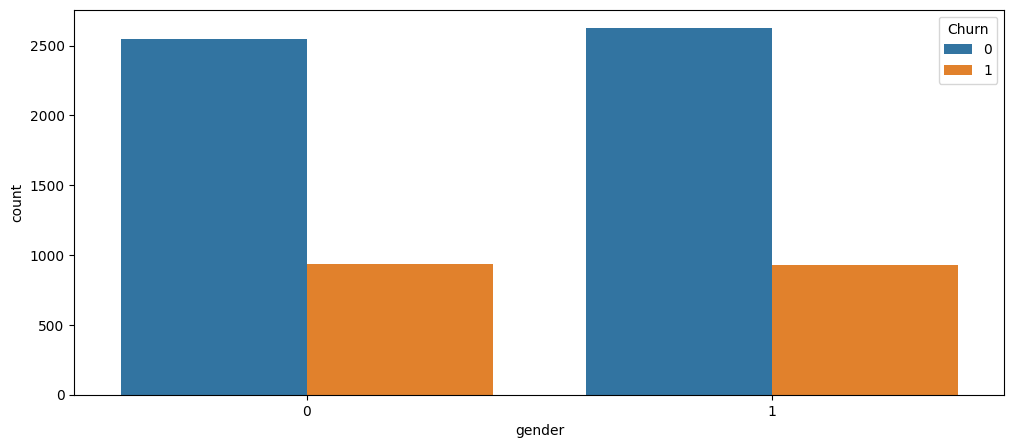

In [32]:
plt.figure(figsize=[12,5])
sns.countplot(x='gender',hue='Churn',data=customer_list);

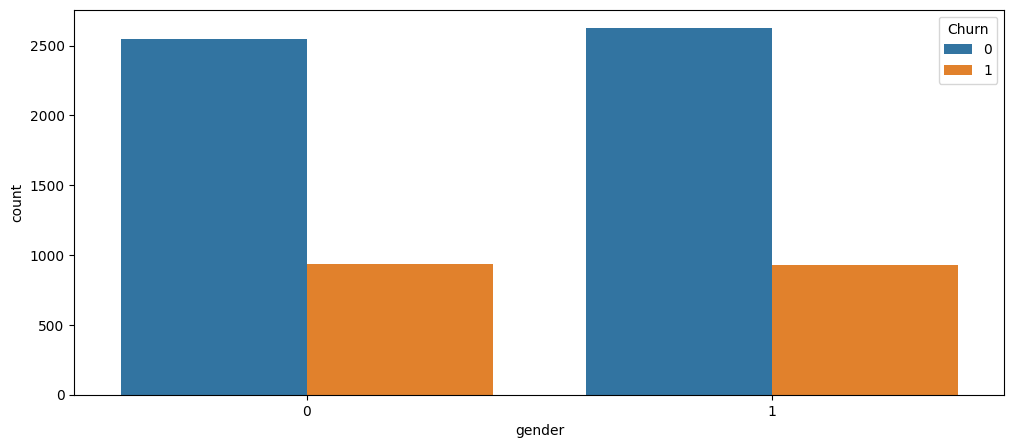

In [45]:
plt.figure(figsize=[12,5])
plt.subplot(111)
sns.countplot(x='gender',hue='Churn',data=customer_list);


<Axes: xlabel='SeniorCitizen', ylabel='count'>

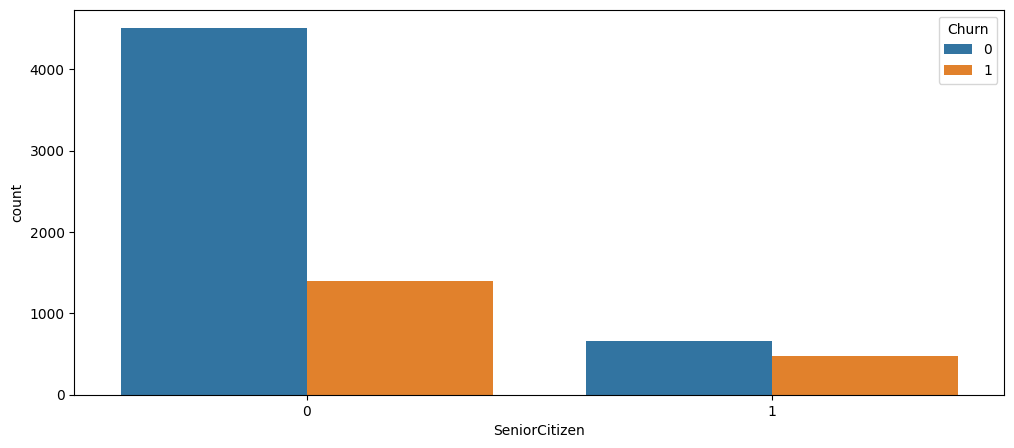

In [35]:
plt.figure(figsize=[12,5])
plt.subplot(111)
sns.countplot(x='SeniorCitizen',hue='Churn',data=customer_list)

<Axes: xlabel='PhoneService', ylabel='count'>

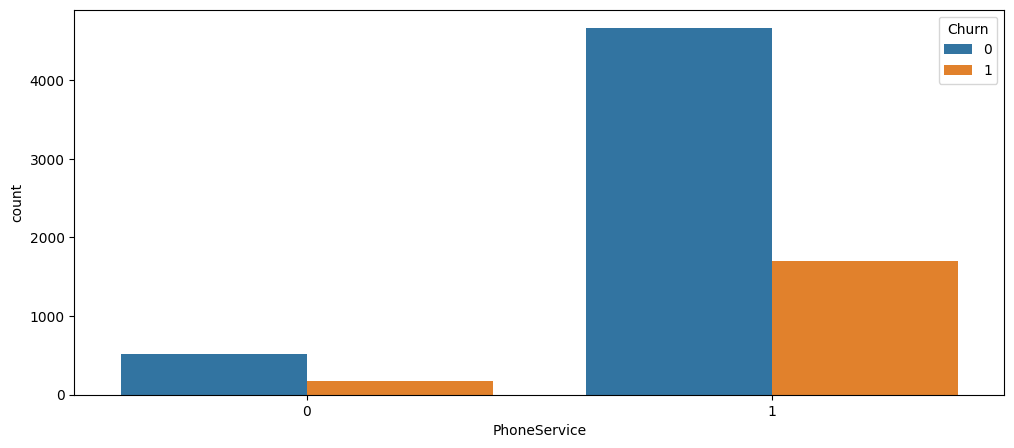

In [38]:
plt.figure(figsize=[12,5])
plt.subplot(111)
sns.countplot(x='PhoneService',hue='Churn',data=customer_list)

<Axes: xlabel='MultipleLines', ylabel='count'>

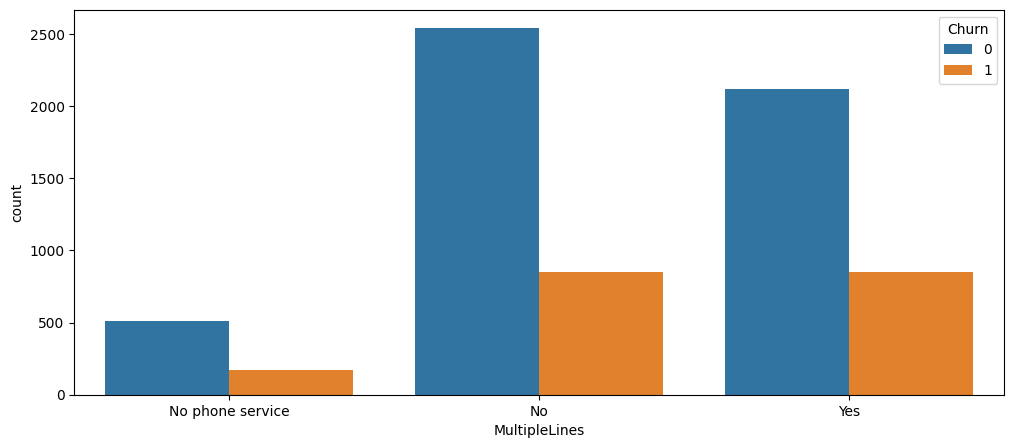

In [39]:
plt.figure(figsize=[12,5])
plt.subplot(111)
sns.countplot(x='MultipleLines',hue='Churn',data=customer_list)

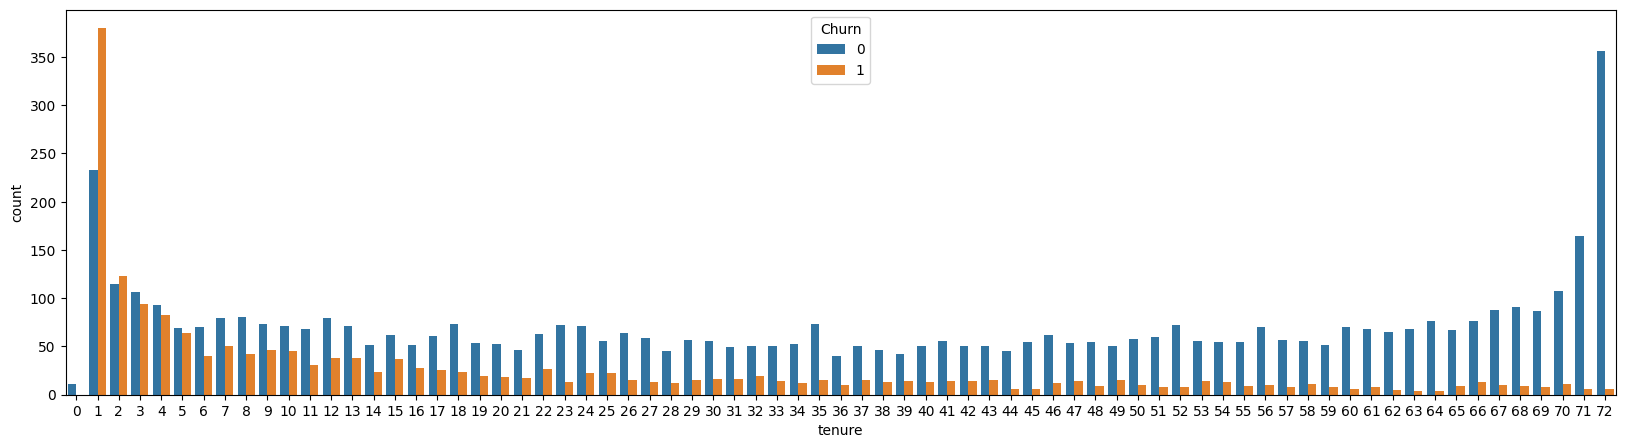

In [43]:
plt.figure(figsize=[20,5])
plt.subplot(111)
sns.countplot(x='tenure',hue='Churn',data=customer_list);

CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [49]:
x_cat=customer_list[['Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges']]

In [50]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder()
x_cat=onehotencoder.fit_transform(x_cat).toarray()

In [51]:
x_cat=pd.DataFrame(x_cat)

In [52]:
x_numerical=customer_list[['gender','SeniorCitizen','tenure','PhoneService']]

In [53]:
x_all=pd.concat([x_cat,x_numerical], axis=1)

In [54]:
#Apply Min Max scaler
from sklearn.preprocessing import MinMaxScaler
x_all.columns = x_all.columns.astype(str)
Scaler=MinMaxScaler()
x=Scaler.fit_transform(x_all)

In [55]:
y=customer_list['Churn']

TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [58]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_pred=model.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix, classification_report

print('Accuracy {} %'.format(100*accuracy_score(y_pred,y_test)))

Accuracy 80.7495741056218 %


<Axes: >

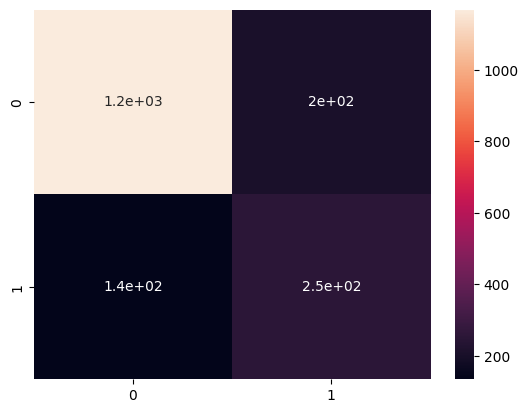

In [61]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1303
           1       0.65      0.55      0.60       458

    accuracy                           0.81      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761



TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [63]:
from sklearn.ensemble import RandomForestClassifier 

In [64]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
y_pred=model.predict(x_test)

<Axes: >

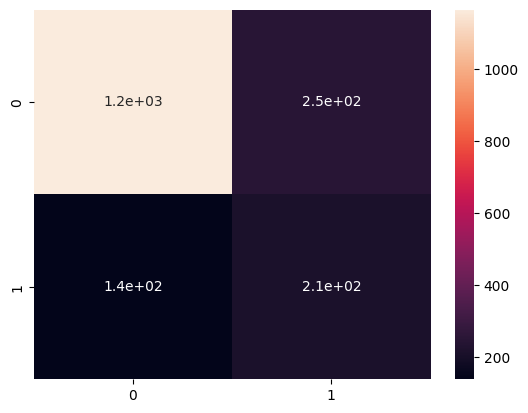

In [66]:
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1303
           1       0.60      0.46      0.52       458

    accuracy                           0.78      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.77      0.78      0.77      1761

